In [1]:
# Check that we reach the target depths of g ∼ 27.6, matching the r ∼27.1 and i ∼26.4 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils

In [2]:
names = ['name', 'ra', 'dec', 'MB', 'mm', 'd', 'rv1', 'rv2']
types = ['|U7', float, float, float, float, float, float,float]
gals = np.genfromtxt('gals.dat', dtype=list(zip(names, types)))

In [3]:
ra = np.concatenate([[0], gals['ra']*360/24.])
dec = np.concatenate([[0], gals['dec']])

In [4]:
conn = maf.db.OpsimDatabase('local_gal_v2.0_10yrs.db')
outDir = 'temp'
resultsDb = maf.db.ResultsDb(outDir=outDir)
name='local_gal'

In [5]:
bundleList = []

for filtername in 'gri':

    # col here could be anything
    metric = maf.metrics.Coaddm5Metric()
    # Select all the visits. Could do something like 'filter="r"' 
    sql = 'filter="%s"' % filtername
    slicer = maf.slicers.UserPointsSlicer(ra=ra, dec=dec)
    plotDict = {}
    bundleList.append(maf.MetricBundle(metric, slicer, sql, runName=name, plotDict=plotDict))


Querying database observations with constraint filter="r" for columns ['fieldDec', 'fieldRA', 'fiveSigmaDepth', 'rotSkyPos']
Found 464679 visits
Running:  ['local_gal_CoaddM5_r_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint filter="g" for columns ['fieldDec', 'fieldRA', 'fiveSigmaDepth', 'rotSkyPos']
Found 219936 visits
Running:  ['local_gal_CoaddM5_g_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint filter="i" for columns ['fieldDec', 'fieldRA', 'fiveSigmaDepth', 'rotSkyPos']
Found 472827 visits
Running:  ['local_gal_CoaddM5_i_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="r"" constraint now.
Plotting complete.
Plotting figures with "filter="g"" constraint now.
Plotting complete.
Plotting figures with "filter="i

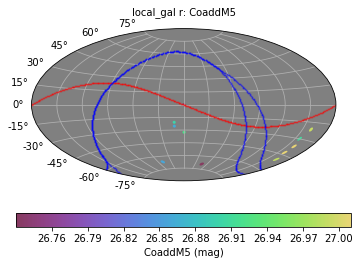

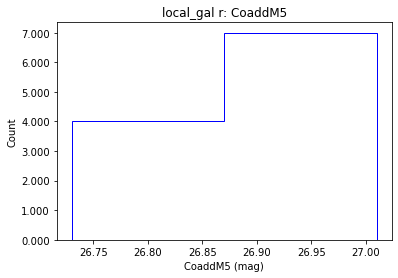

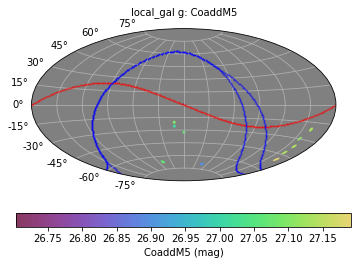

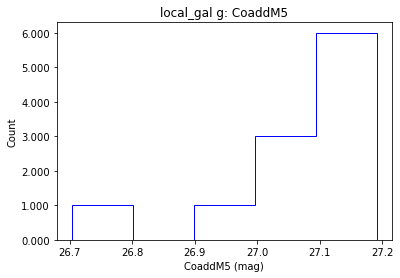

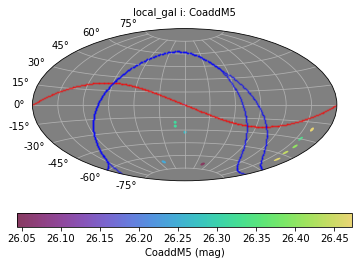

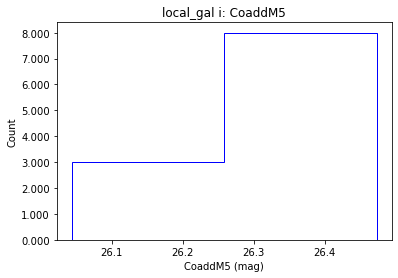

In [6]:
bd = maf.metricBundles.makeBundlesDictFromList(bundleList)
bg = maf.metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)


In [7]:
bundleList[0].metricValues

masked_array(data=[26.70416863694819, 27.095157353917145,
                   27.013393937078437, 27.064340090386466,
                   27.19118630534063, 27.133431560479835,
                   27.139366162608436, 27.139835622064524,
                   27.105285051590258, 26.899633992895456,
                   27.061690978765597],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False],
       fill_value=-666.0)

In [8]:
bundleList[1].metricValues

masked_array(data=[26.74278634896617, 26.90037414864156,
                   26.86225806806589, 26.857348272736083,
                   26.98899402360042, 26.992306332222732,
                   27.009103228762818, 27.010036639613922,
                   26.909156469659038, 26.73051396041585,
                   26.921979011581524],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False],
       fill_value=-666.0)

In [9]:
bundleList[2].metricValues

masked_array(data=[26.198402762943655, 26.317054484327215,
                   26.317724090762486, 26.242300883903383,
                   26.466242164542997, 26.472571602812856,
                   26.403911643678946, 26.44199353128892,
                   26.335508917617755, 26.044491684843617,
                   26.267786353235955],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False],
       fill_value=-666.0)